# Spam

This example uses the 'Spam' dataset to detect SMS spam. You can download the Jupyter Notebook of the study <a href="spam.ipynb">here</a>.

<ul>
    <li class="ul_content"><b>v1: </b> the SMS type (spam or ham)</li>
    <li><b>v2: </b> SMS content</li>
</ul>
	
We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.


## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

/usr/local/lib/python3.12/site-packages/vertica_highcharts/highcharts/highcharts.py:11: UserWarning: future library does not support Python 3.12 yet. The import is skipped.
  warnings.warn('future library does not support Python 3.12 yet. The import is skipped.')
/usr/local/lib/python3.12/site-packages/vertica_highcharts/highmaps/highmaps.py:11: UserWarning: future library does not support Python 3.12 yet. The import is skipped.
  warnings.warn('future library does not support Python 3.12 yet. The import is skipped.')
/usr/local/lib/python3.12/site-packages/vertica_highcharts/highstock/highstock.py:11: UserWarning: future library does not support Python 3.12 yet. The import is skipped.
  warnings.warn('future library does not support Python 3.12 yet. The import is skipped.')


'1.0.1'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="https://www.vertica.com/python/documentation/1.0.x/html/connection.html">connection tutorial</a>.

You can skip the below cell if you already have an established connection.

In [2]:
vp.connect("VerticaDSN")

Let's create a Virtual DataFrame of the dataset. The dataset is available <a href="../../data/spam.csv">here</a>.

,AbctypeVarchar(20),AbcVarchar(1820)
1,ham,
2,ham,
3,ham,
4,ham,
5,ham,
6,ham,
7,ham,"<input style=""background-color: #FFFFFF; border: none; color: #000000; text-align: center; width: 270px;"" type=""text"" value=""&lt;#&gt; is fast approaching. So, Wish u a very Happy New Year Happy Sankranti Happy republic day Happy Valentines Day Happy Shivratri Happy Ugadi Happy Fools day Happy May Day Happy Independence Day, Happy Friendship,Mother,Father,Teachers,Childrens Day, &amp; HAPPY BIRTHDAY 4 U. Happy Ganesh festival Happy Dasara Happy Diwali Happy Christmas &lt;#&gt; Good Mornings Afternoons, Evenings Nights. RememberI AM the first to WISHING U ALL THESE...your's Raj"" readonly>"
8,ham,
9,ham,
10,ham,

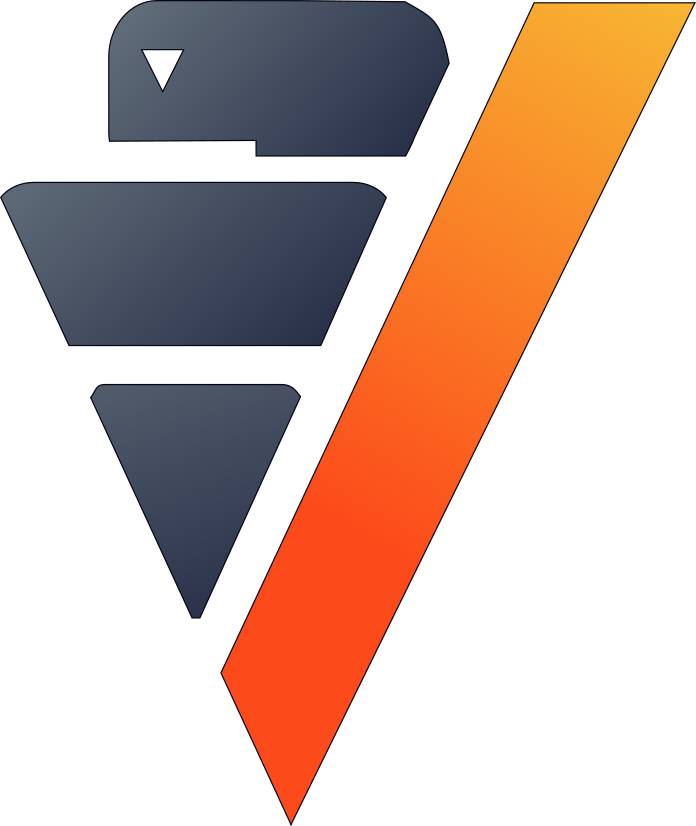

In [2]:
spam = vp.read_csv("spam.csv")
display(spam)

## Data Exploration and Preparation

Our dataset relies on text analysis. First, we should create some features. For example, we can use the SMS length and label encoding on the 'type' to get a dummy (1 if the message is a SPAM, 0 otherwise). We should also convert the message content to lowercase to simplify our analysis.

,123typeInteger,AbcVarchar(3640),123lengthInteger
1,0,,103
2,0,,133
3,0,,200
4,0,,45
5,0,,85
6,0,,35
7,0,"<input style=""background-color: #FFFFFF; border: none; color: #000000; text-align: center; width: 270px;"" type=""text"" value=""&lt;#&gt; is fast approaching. so, wish u a very happy new year happy sankranti happy republic day happy valentines day happy shivratri happy ugadi happy fools day happy may day happy independence day, happy friendship,mother,father,teachers,childrens day, &amp; happy birthday 4 u. happy ganesh festival happy dasara happy diwali happy christmas &lt;#&gt; good mornings afternoons, evenings nights. rememberi am the first to wishing u all these...your's raj"" readonly>",461
8,0,,50
9,0,,37
10,0,,327

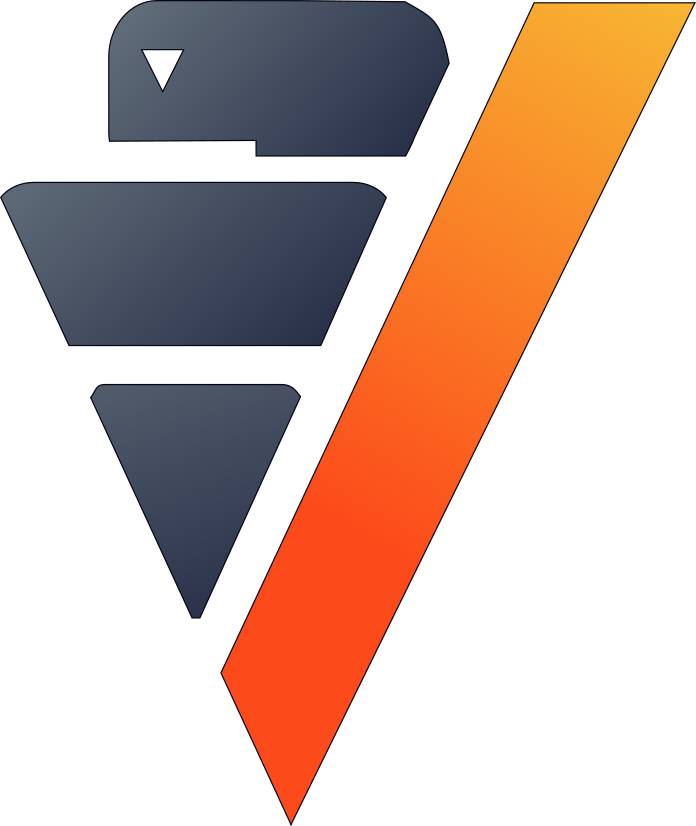

In [3]:
import verticapy.sql.functions as st
spam["length"] = st.length(spam["content"])
spam["content"].apply("LOWER({})")
spam["type"].decode('spam', 1, 0)

Let's compute some statistics using the length of the message.

,count,percent,mean,std,min,approx_10%,approx_25%,approx_50%,approx_75%,approx_90%,max
0,4723,86.53352876511542,69.5968663984755,56.2618267177762,2,24.0,33.0,51.0,89.0,143.0,910
1,735,13.466471234884573,139.239455782313,29.1254417417428,13,101.0,133.5,149.0,158.0,161.0,224

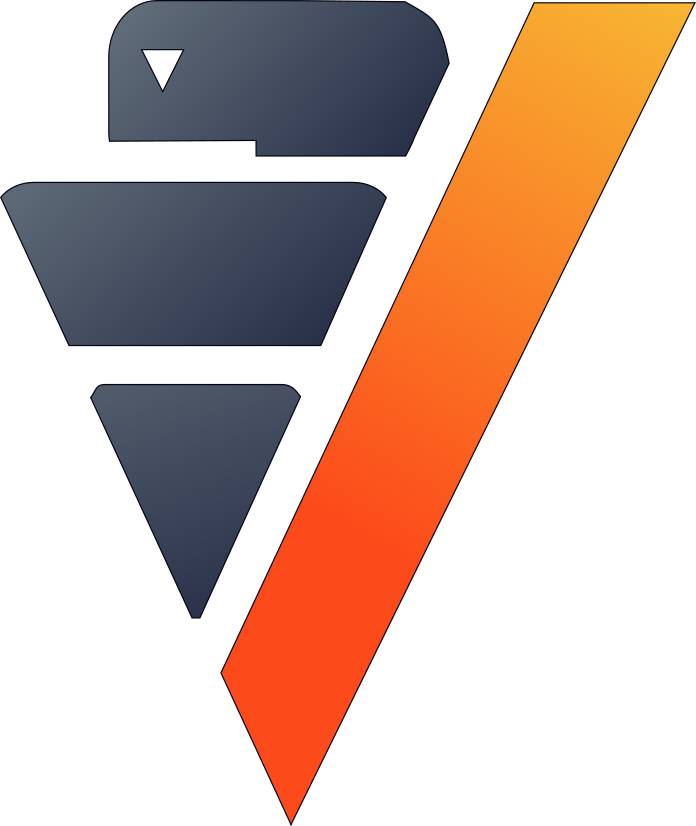

In [4]:
spam['type'].describe(method = 'cat_stats', 
                      numcol = 'length')

Notice: spam tends to be longer than a normal message. First, let's create a view with just spam. Then, we'll use the CountVectorizer to create a dictionary and identify keywords.

/usr/local/lib/python3.12/site-packages/vertica_python/vertica/connection.py:693: UserWarning: WARNING 2957: Current system KSAFE level is not fault tolerant
HINT: Use mark_design_ksafe() to set system KSAFE level
  warnings.warn(notice)


,AbctokenVarchar(128),123dfNumeric(38),123cntInteger,123rnkInteger
1,to,0.028203859475507177,456,1
2,call,0.01966848095002474,318,2
3,a,0.01793666501731816,290,3
4,you,0.014287481444829293,231,4
5,your,0.013854527461652647,224,5
6,now,0.011071251855517071,179,6
7,or,0.010885700148441367,176,7
8,for,0.010761999010390896,174,8
9,free,0.009896091044037604,160,9
10,the,0.00983424047501237,159,10

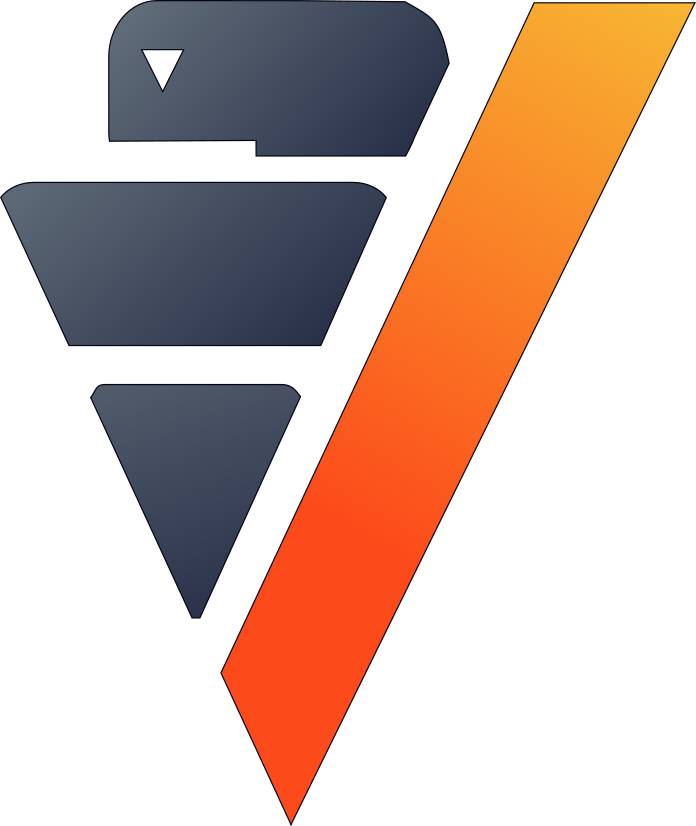

In [5]:
spams = spam.search(spam["type"] == 1)

from verticapy.machine_learning.vertica.preprocessing import CountVectorizer
dict_spams = CountVectorizer("spams_voc")
dict_spams.fit(spams, ["content"])
dict_spams = dict_spams.transform()
display(dict_spams)

Let's add the most occurent words in our vDataFrame and compute the correlation vector.

,"""type"""
"""type""",1.0
"""1""",0.724653615894895
"""2""",0.63843648495832
"""3""",0.591763485013605
"""4""",0.578573458001
"""c""",0.502409497085917
"""150""",0.468159651523727
"""150p""",0.436250790916466
"""mob""",0.422469250287241
"""txt""",0.419263371716834

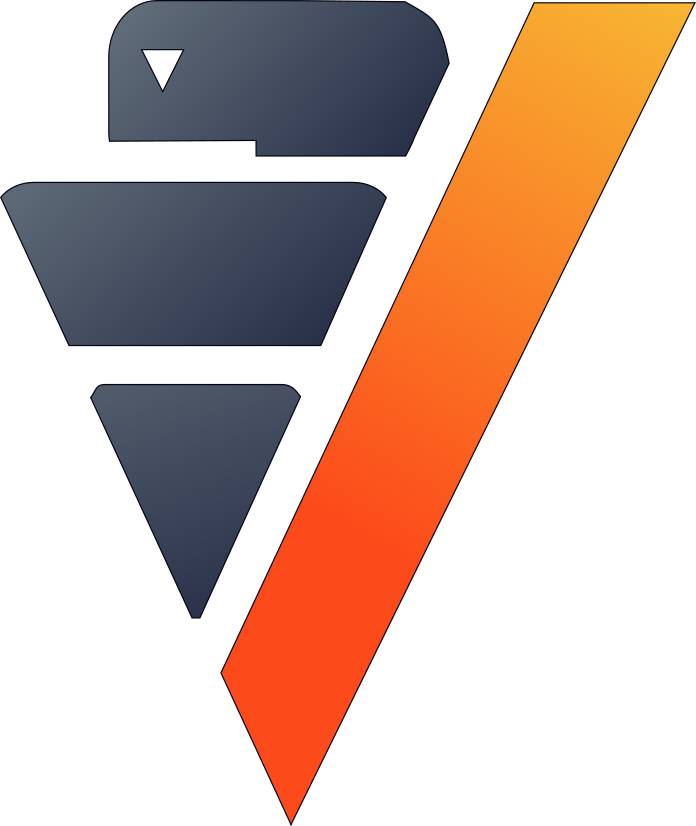

In [11]:
for elem in dict_spams.head(200).values["token"]:
    spam.regexp(name = elem,
                pattern = elem,
                method = "count",
                column = "content")
x = spam.corr(focus = "type", show = False)
x

Let's just keep the first 100-most correlated features and merge the numbers together.

,123typeInteger,AbcVarchar(3640),123lengthInteger,123toInteger,123callInteger,123aInteger,123yourInteger,123nowInteger,123orInteger,123freeInteger,123txtInteger,123fromInteger,123onInteger,123uInteger,123urInteger,123mobileInteger,123claimInteger,123textInteger,123stopInteger,123replyInteger,123prizeInteger,123ourInteger,123wonInteger,123newInteger,123urgentInteger,...,123mobInteger,123liveInteger,123validInteger,123ringtoneInteger,123collectInteger,123saeInteger,123rInteger,123entryInteger,123costInteger,123bonusInteger,123vouchersInteger,123rateInteger,123tonesInteger,123awaitInteger,123landInteger,123awardInteger,123cInteger,123winnerInteger,123topInteger,123poboxInteger,123wkInteger,123voucherInteger,123polyInteger,123ltdInteger,123nb_numbersInteger
1,0,,103,2,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3
2,0,,133,1,0,6,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
3,0,,200,4,0,18,0,0,0,0,0,0,3,8,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1
4,0,,45,0,0,3,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,,85,1,0,8,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
6,0,,35,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
7,0,"<input style=""background-color: #FFFFFF; border: none; color: #000000; text-align: center; width: 270px;"" type=""text"" value=""&lt;#&gt; is fast approaching. so, wish u a very happy new year happy sankranti happy republic day happy valentines day happy shivratri happy ugadi happy fools day happy may day happy independence day, happy friendship,mother,father,teachers,childrens day, &amp; happy birthday 4 u. happy ganesh festival happy dasara happy diwali happy christmas &lt;#&gt; good mornings afternoons, evenings nights. rememberi am the first to wishing u all these...your's raj"" readonly>",461,1,0,47,1,0,1,0,0,0,1,6,1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,1
8,0,,50,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,,37,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,,327,2,0,11,1,0,1,0,0,0,3,11,1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1

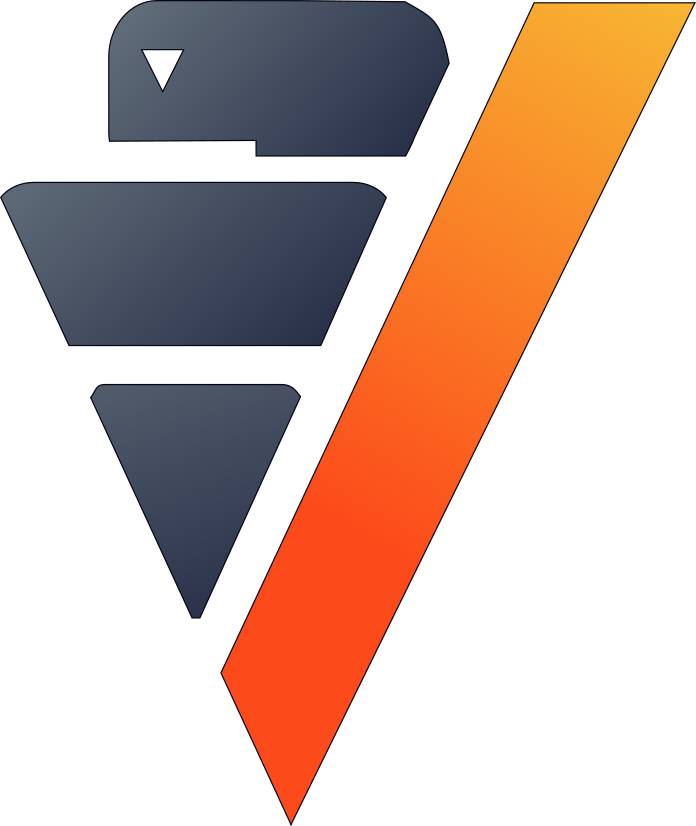

In [12]:
spam.drop(columns = x["index"][101:])
for elem in x["index"][1:101]:
    if any(char.isdigit() for char in elem):
        spam[elem].drop()
spam.regexp(column = "content",
            pattern = "([0-9])+",
            method = "count",
            name = "nb_numbers")

Let's narrow down our keyword list to words of more than two characters.

In [13]:
for elem in spam.get_columns():
    if len(elem.replace('"', '')) <= 2:
        spam[elem].drop()

Compute the correlation vector again using the response column.

<Axes: >

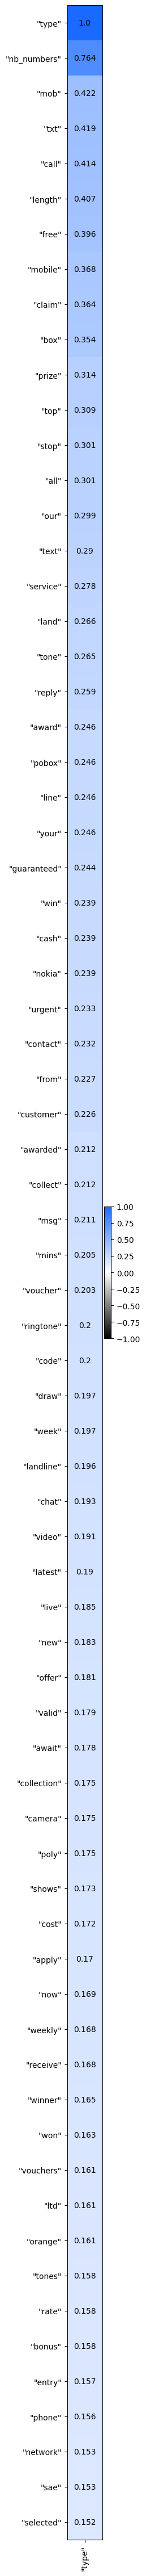

In [14]:
spam.corr(focus = "type")

We have enough correlated features with our response to create a fantastic model.

# Machine Learning

The naive Bayes classifier is a powerful and performant algorithm for text analytics and binary classification. Before using it on our data, let's use a cross-validation to test the efficiency of our model.

  0%|          | 0/5 [00:00<?, ?it/s]

,auc,prc_auc,accuracy,log_loss,precision,recall,f1_score,mcc,informedness,markedness,csi,time
1-fold,0.9431087241616183,0.9123482986537949,0.9715596330275229,0.0587889885797997,0.8992248062015504,0.8656716417910447,0.8821292775665398,0.866167254064314,0.8520733154312121,0.8804943171276691,0.7891156462585034,4.01793646812439
2-fold,0.9631636175616282,0.9318317735504444,0.9743354720439963,0.12902500044732,0.9044117647058824,0.8913043478260869,0.8978102189781022,0.8831668305634494,0.8776632145627081,0.8887049584231599,0.8145695364238411,4.151615142822266
3-fold,0.9534729547585544,0.9263462061552417,0.967032967032967,0.0615535413121363,0.8506493506493507,0.9097222222222222,0.8791946308724832,0.8607814230000825,0.8854606188466949,0.8367900755960458,0.7844311377245509,3.9770307540893555
4-fold,0.949112300972242,0.9219669679570787,0.9743354720439963,0.0547166212314421,0.9361702127659575,0.8741721854304636,0.9041095890410958,0.8900104913186456,0.8645977173453572,0.9161702127659574,0.825,3.912130832672119
5-fold,0.9606278337831149,0.9414411626362124,0.9725776965265083,0.0535475614525478,0.9150326797385621,0.89171974522293,0.9032258064516128,0.8873547334353357,0.8778456790543068,0.8969667923846831,0.8235294117647058,3.8538239002227783
avg,0.9538970862474316,0.9267868817905545,0.971968248134998,0.07152634260464917,0.9010977628122607,0.8865180284985495,0.8932939045819668,0.8774961464763654,0.8715281090480559,0.883825271259503,0.8073291464343202,3.982507419586182
std,0.007357096970004338,0.009716967915427428,0.0026871133684569968,0.028891507095486855,0.028226907447585773,0.015332273124179768,0.010577875177189423,0.011778650226974462,0.01181681313701617,0.026329113361003093,0.017223131545930304,0.1013853495775428

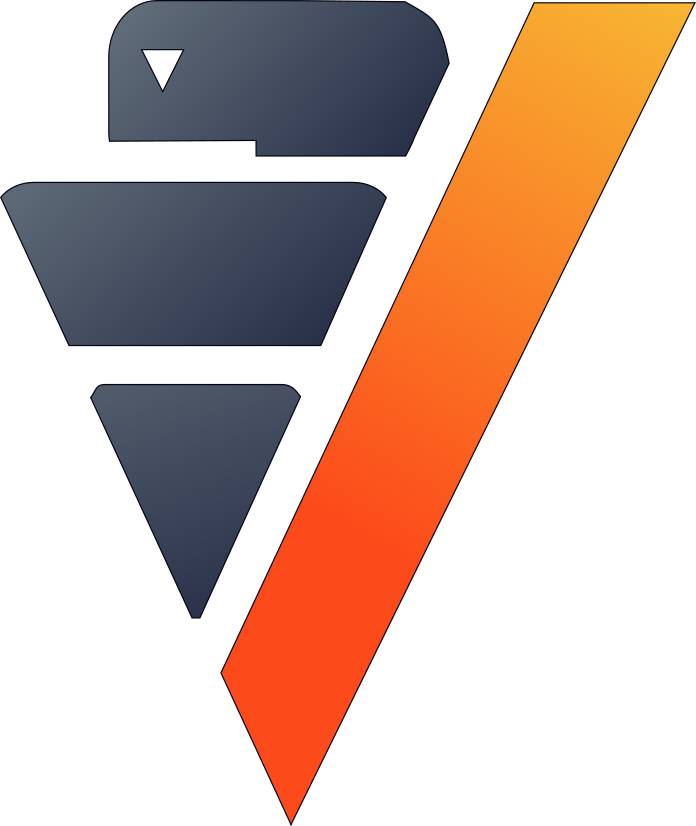

In [16]:
from verticapy.machine_learning.vertica.naive_bayes import MultinomialNB
model = MultinomialNB("spam_nb")

from verticapy.machine_learning.model_selection import cross_validate
cross_validate(model, 
               spam, 
               spam.get_columns(exclude_columns = ["type", "content"]), 
               "type", 
               cv = 5)

We have an excellent model! Let's learn from the data.

In [17]:
model.fit(spam, 
          spam.get_columns(exclude_columns = ["type", "content"]), 
          "type")
model.confusion_matrix()



details
index|predictor |   type    
-----+----------+-----------
  0  |   type   | ResponseI 
  1  |  length  |Multinomial
  2  |   call   |Multinomial
  3  |   your   |Multinomial
  4  |   now    |Multinomial
  5  |   free   |Multinomial
  6  |   txt    |Multinomial
  7  |   from   |Multinomial
  8  |  mobile  |Multinomial
  9  |  claim   |Multinomial
 10  |   text   |Multinomial
 11  |   stop   |Multinomial
 12  |  reply   |Multinomial
 13  |  prize   |Multinomial
 14  |   our    |Multinomial
 15  |   won    |Multinomial
 16  |   new    |Multinomial
 17  |  urgent  |Multinomial
 18  |   cash   |Multinomial
 19  |   win    |Multinomial
 20  | contact  |Multinomial
 21  | service  |Multinomial
 22  |guaranteed|Multinomial
 23  |  nokia   |Multinomial
 24  | customer |Multinomial
 25  |  phone   |Multinomial
 26  |   week   |Multinomial
 27  |   tone   |Multinomial
 28  |   draw   |Multinomial
 29  | awarded  |Multinomial
 30  |   chat   |Multinomial
 31  |   line   |Multinomial
 32 

array([[4644,   79],
       [  77,  658]])

Our model can reliably identify spam.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!